In [5]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\hp\Downloads\insurance data (1).csv")

In [6]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [7]:
data.Policy_Sales_Channel.value_counts()

152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
43          1
144         1
143         1
41          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


<Axes: xlabel='Gender', ylabel='count'>

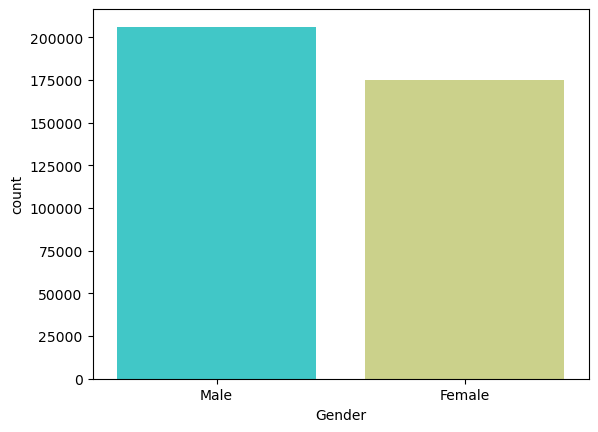

In [11]:
sns.countplot(x='Gender',data=data , palette = 'rainbow')

<Axes: xlabel='Gender', ylabel='Age'>

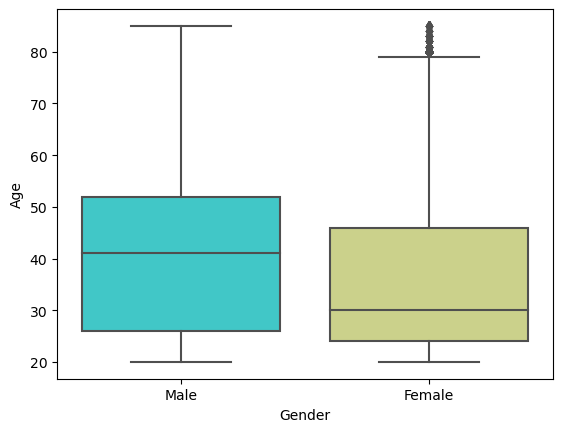

In [12]:
sns.boxplot(x='Gender',y='Age',data=data , palette= 'rainbow')

C:\Users\hp\AppData\Local\Temp\ipykernel_15340\3175917613.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

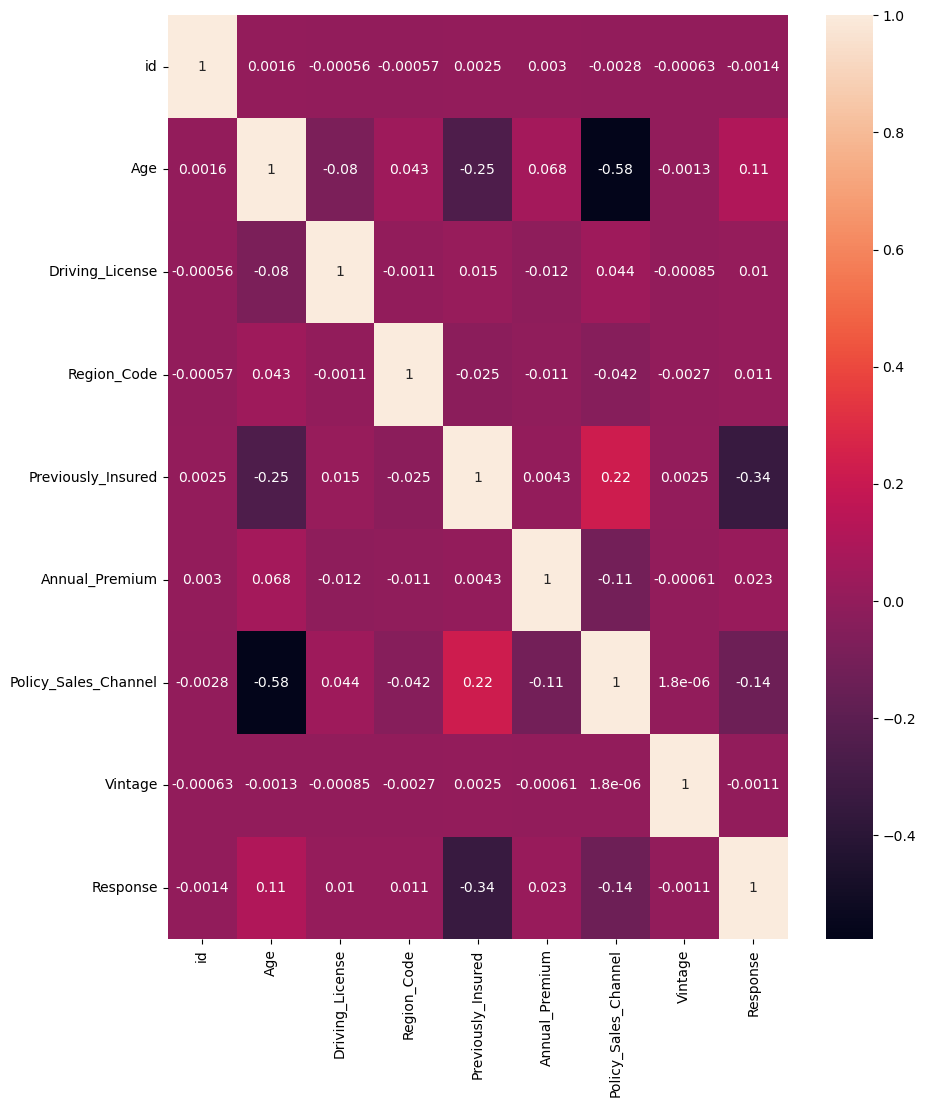

In [13]:
plt.figure(figsize= [10,12])
sns.heatmap(data.corr(),annot = True)

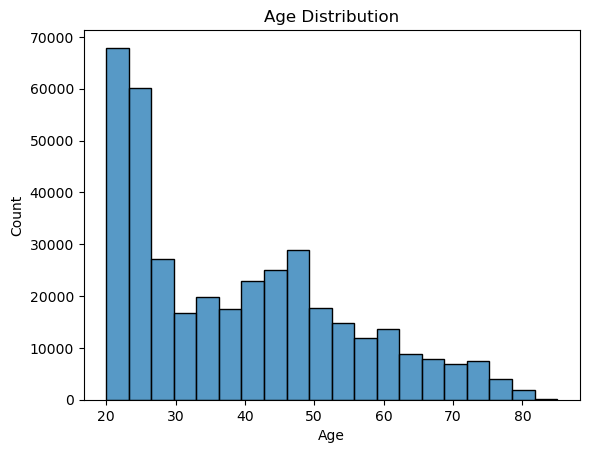

In [14]:
sns.histplot(data=data, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

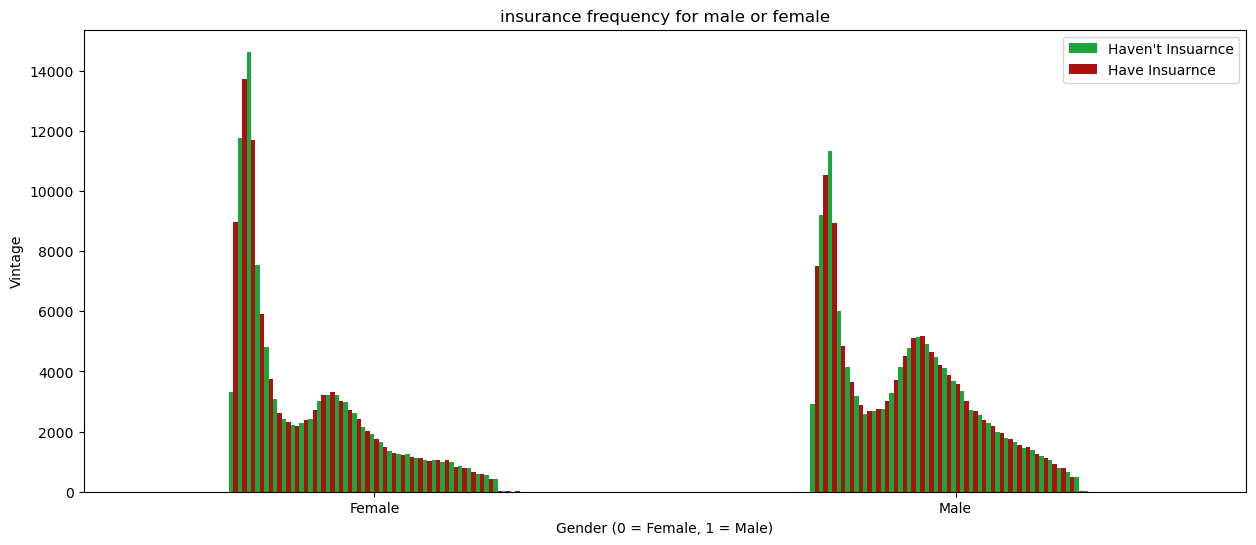

In [15]:
pd.crosstab(data.Gender,data.Age).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('insurance frequency for male or female')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Insuarnce", "Have Insuarnce"])
plt.ylabel('Vintage')
plt.show()

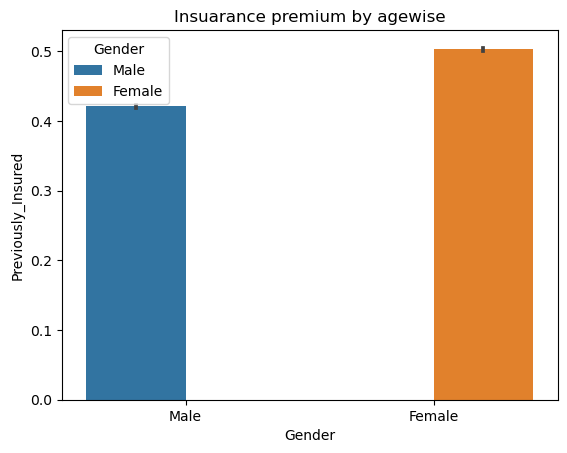

In [16]:
sns.barplot(data=data, x='Gender', y='Previously_Insured', hue='Gender')
plt.title('Insuarance premium by agewise')
plt.show()

In [17]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [18]:
data[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


descriptive statistics


<Axes: ylabel='count'>

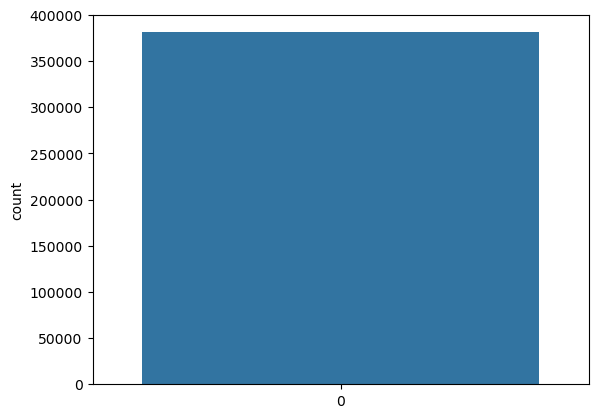

In [19]:
sns.countplot(data.Response)

In [20]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

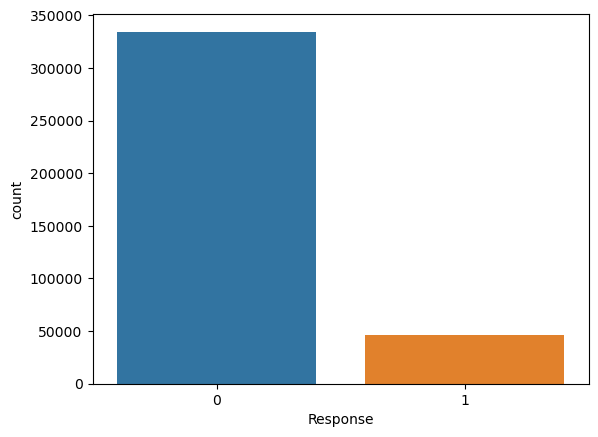

In [21]:
sns.countplot(x='Response', data=data)

C:\Users\hp\AppData\Local\Temp\ipykernel_15340\4003340619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


<Axes: xlabel='Age', ylabel='Density'>

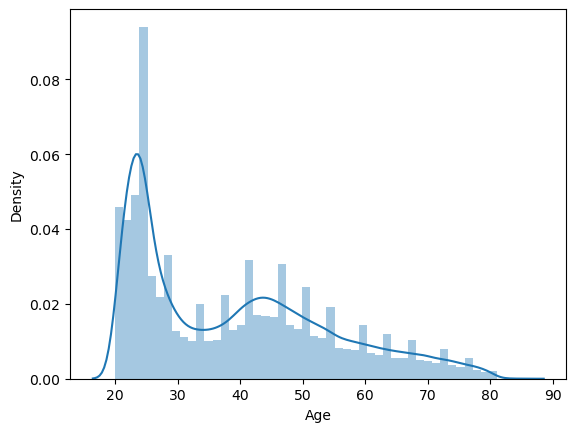

In [22]:
sns.distplot(data.Age)

<Axes: ylabel='Age'>

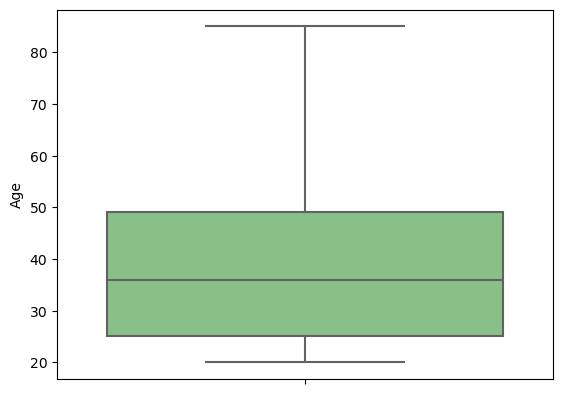

In [23]:
sns.boxplot(y = 'Age', data = data,palette='Accent')

<Axes: xlabel='Age', ylabel='Annual_Premium'>

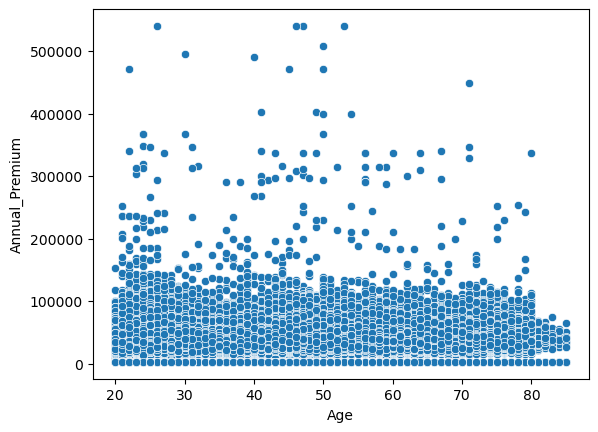

In [24]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])

<Axes: xlabel='Gender', ylabel='count'>

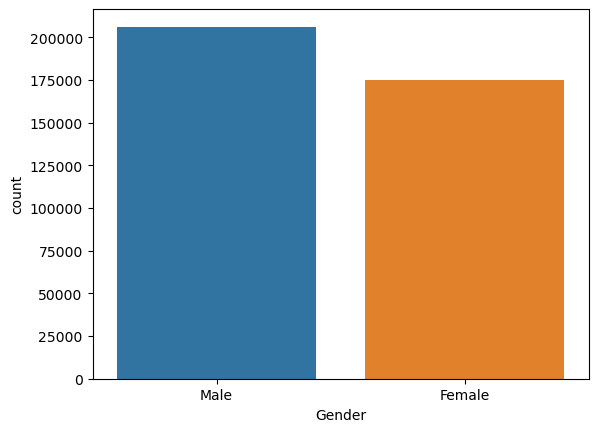

In [25]:
#sns.countplot(data.Gender)
sns.countplot(x='Gender', data=data)

In [26]:
data.groupby(['Gender','Response'])['id'].count()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: id, dtype: int64

In [27]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [28]:
df

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


categorical plot

categorical we are using seaborn cat plot to create a barplot with multiple categorical variables.
the cat.plot function can be used to create  diffrent types of plot including barplot by specifying kind of parametre


In [29]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [30]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


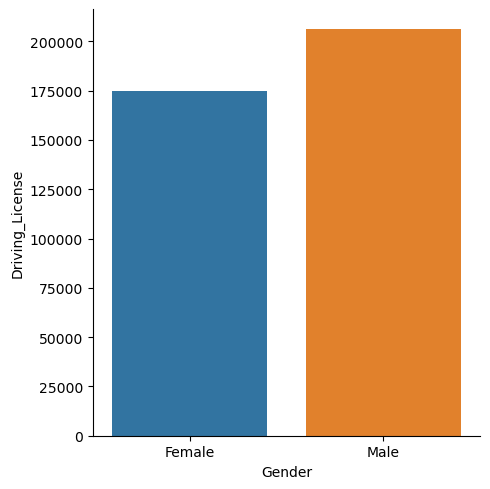

In [31]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

In [32]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


we are using the groupby in panda to group our data by vechice_age and responce.it willl create adatafarame with count of each coibnation vechicle_age and responce.in summery the data frame shows the count compentents for each vechicle age and responces.the count column rfepresents the number of instances for each group .

<Axes: xlabel='Vehicle_Age', ylabel='count'>

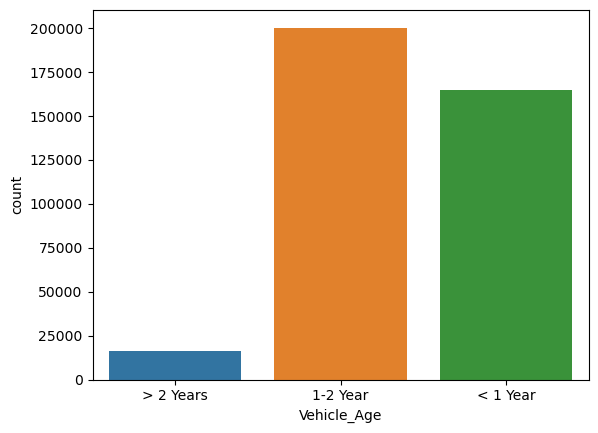

In [33]:
sns.countplot(x='Vehicle_Age', data =data)

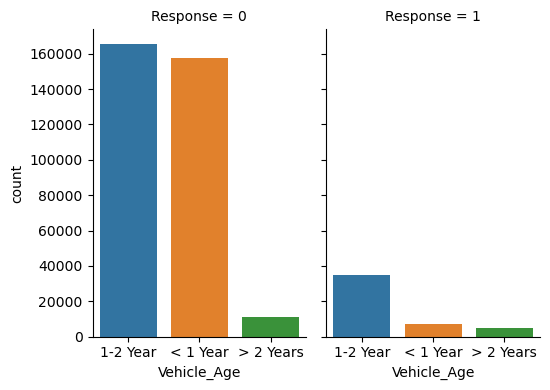

In [34]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

the cat plot funtion is creating two separate barplot and counting the number of occurances each combination of vechicle age and responce.


<Axes: xlabel='Vehicle_Damage', ylabel='count'>

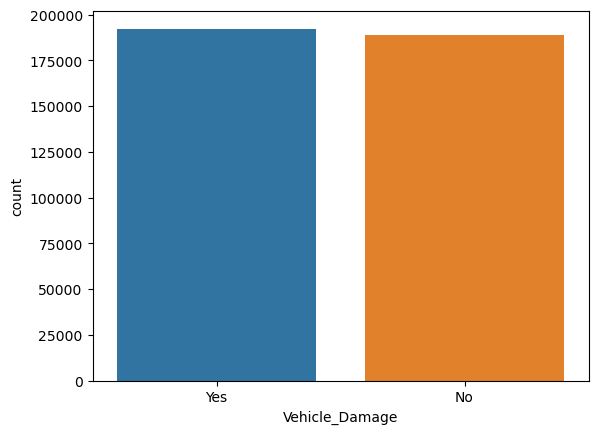

In [35]:
#sns.countplot(data.Vehicle_Damage)
sns.countplot(x='Vehicle_Damage', data=data)

In [44]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


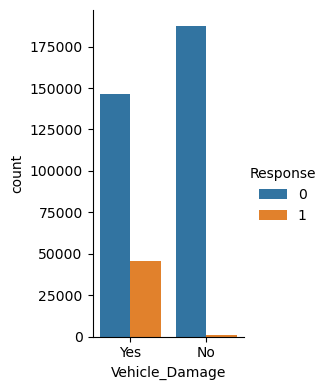

In [45]:
g = sns.catplot(x="Vehicle_Damage", hue="Response", data=data, kind="count", height=4, aspect=.7)

<Axes: ylabel='Annual_Premium'>

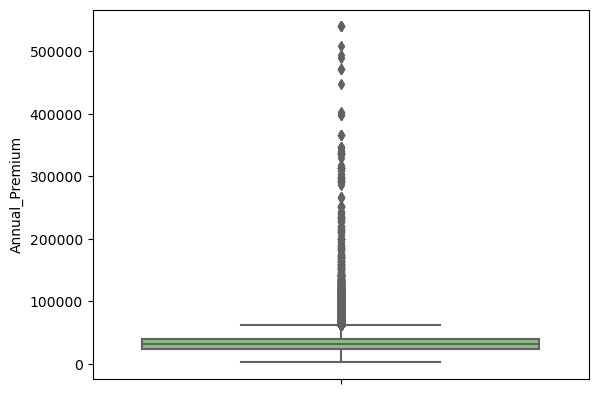

In [46]:
sns.boxplot(y = 'Annual_Premium', data = data,palette='Accent')

C:\Users\hp\AppData\Local\Temp\ipykernel_15340\2668101889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Vintage)


<Axes: xlabel='Vintage', ylabel='Density'>

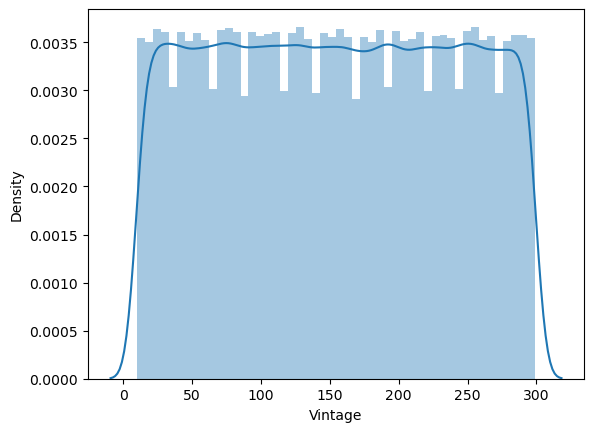

In [47]:
#Vintage- Number of Days, Customer has been associated with the company
sns.distplot(data.Vintage)

C:\Users\hp\AppData\Local\Temp\ipykernel_15340\486077785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Annual_Premium)


<Axes: xlabel='Annual_Premium', ylabel='Density'>

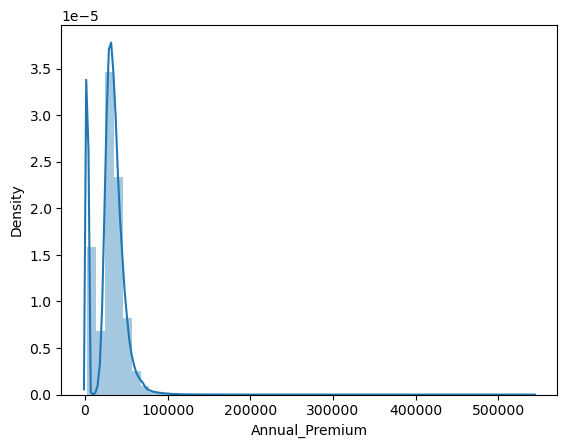

In [48]:
sns.distplot(data.Annual_Premium)

<Axes: ylabel='Vintage'>

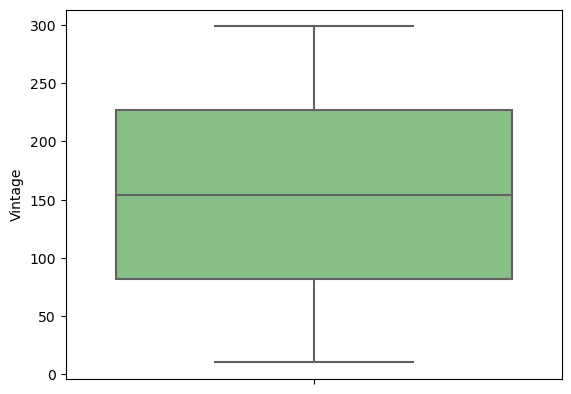

In [49]:
sns.boxplot(y = 'Vintage', data = data,palette='Accent')

In [50]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [51]:
data['Gender'] = data['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [52]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,1,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,1,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,0,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [53]:
data=data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", 
                            "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})



In [54]:
data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [59]:
#data['Vehicle_Age_lt_1_Year']=data['Vehicle_Age_lt_1_Year'].astype('int')

In [61]:
#data['Vehicle_Damage_Yes']=data['Vehicle_Damage_Yes'].astype('int')

In [62]:
data['Vehicle_Damage'] = data['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [63]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1-2 Year,0,30170,26,88,0
381105,381106,1,30,1,37,1,< 1 Year,0,40016,152,131,0
381106,381107,1,21,1,30,1,< 1 Year,0,35118,160,161,0
381107,381108,0,68,1,14,0,> 2 Years,1,44617,124,74,0


In [64]:
data=pd.get_dummies(data,drop_first=True)

In [65]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28,0,1,40454,26,217,1,0,1
1,2,1,76,1,3,0,0,33536,26,183,0,0,0
2,3,1,47,1,28,0,1,38294,26,27,1,0,1
3,4,1,21,1,11,1,0,28619,152,203,0,1,0
4,5,0,29,1,41,1,0,27496,152,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,0,30170,26,88,0,0,0
381105,381106,1,30,1,37,1,0,40016,152,131,0,1,0
381106,381107,1,21,1,30,1,0,35118,160,161,0,1,0
381107,381108,0,68,1,14,0,1,44617,124,74,0,0,1


we are using pd.get_dummies() function from the pandas librarory to perform one hot encoding.one hot encoding is used to conevert the categorical variable into the binary columns making them suitable for ML alagorithams that require numrical input .

here we are applying the function and function called applies one hot encoding to the categorica column into te data frame.
drop_first=True parametre indicates that for each categoricalvariable the first category will be drop to avoid multicollineriaty 
for example let us have a categorical column named as colour with values as red blue and green.after applying pd.pd.get_dummies
with drop_first = True the data frame = separate binary column for each category.

In [66]:
y = data.Annual_Premium.values # dependent or target variable
x_data = data.drop(['Annual_Premium'], axis = 1)

In [67]:
x_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28,0,1,26,217,1,0,1
1,2,1,76,1,3,0,0,26,183,0,0,0
2,3,1,47,1,28,0,1,26,27,1,0,1
3,4,1,21,1,11,1,0,152,203,0,1,0
4,5,0,29,1,41,1,0,152,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,0,26,88,0,0,0
381105,381106,1,30,1,37,1,0,152,131,0,1,0
381106,381107,1,21,1,30,1,0,160,161,0,1,0
381107,381108,0,68,1,14,0,1,124,74,0,0,1


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.25,random_state=0)

In [71]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

MemoryError: Unable to allocate 97.4 GiB for an array with shape (285831, 45732) and data type float64

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
batch_size = 1000

In [75]:
lr = LogisticRegression(solver='lbfgs', max_iter=100, multi_class='auto')

In [76]:
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size + 1

for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, num_samples)
    
    lr.partial_fit(x_train[start_idx:end_idx], y_train[start_idx:end_idx], classes=np.unique(y_train))

AttributeError: 'LogisticRegression' object has no attribute 'partial_fit'

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [78]:
sgd = SGDClassifier(loss='log', max_iter=100, random_state=42)

In [79]:
batch_size = 1000

In [80]:
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size + 1

In [ ]:
for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, num_samples)
    
    sgd.partial_fit(x_train[start_idx:end_idx], y_train[start_idx:end_idx], classes=np.unique(y_train))

In [ ]:
y_pred = sgd.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100

In [ ]:
acc = lr.score(x_test, y_test) * 100

In [ ]:
print("Accuracy: {:.2f}%".format(acc))

In [ ]:
#accuracies['Logistic Regression'] = acc
#print("Test Accuracy {:.2f}%".format(acc))

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()

In [72]:
dtc.fit(x_train, y_train)

MemoryError: could not allocate 23976738816 bytes

In [43]:
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=100, random_state=42)

In [ ]:
batch_size = 1000

In [ ]:
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size + 1

In [ ]:
for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, num_samples)
    
    sgd.partial_fit(x_train[start_idx:end_idx], y_train[start_idx:end_idx], classes=np.unique(y_train))